In [ ]:

from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

# Configure plot settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cognizint-eda/sample_sales_data.csv")
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
df.size

70461

In [ ]:
df.shape

(7829, 9)

In [ ]:
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [ ]:


df.isnull().sum()


transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [ ]:


for column in df.columns:
    data_type = df[column].dtype
    print(f"Column name: {column}, Data type: {data_type}")


Column name: transaction_id, Data type: object
Column name: timestamp, Data type: object
Column name: product_id, Data type: object
Column name: category, Data type: object
Column name: customer_type, Data type: object
Column name: unit_price, Data type: float64
Column name: quantity, Data type: int64
Column name: total, Data type: float64
Column name: payment_type, Data type: object


## descriptive analysis of the numeric columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [ ]:
df.describe()


,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [ ]:


df["unit_price"].value_counts()


unit_price
3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
        ... 
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: count, Length: 64, dtype: int64

# visualization


Column: unit_price has 64 unique values

unit_price
3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
        ... 
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: count, Length: 64, dtype: int64


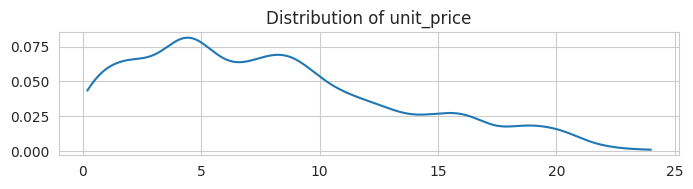

In [ ]:
import matplotlib.pyplot as plt

def plot_continuous_distribution_mpl(data, column, bins=10, color='k'):
  """
  Plots the distribution of a continuous variable using matplotlib.

  Args:
    data: Pandas DataFrame containing the data.
    column: Name of the column to be plotted.
    bins: Number of bins in the histogram (default 10).
    color: Color of the plot (default black).
  """

  plt.hist(data[column], bins=bins, edgecolor=color)
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {column}")
  plt.show()

# plot_continuous_distribution_mpl(df, "unit_price")
plot_continuous_distribution(data=df, column='unit_price')


In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

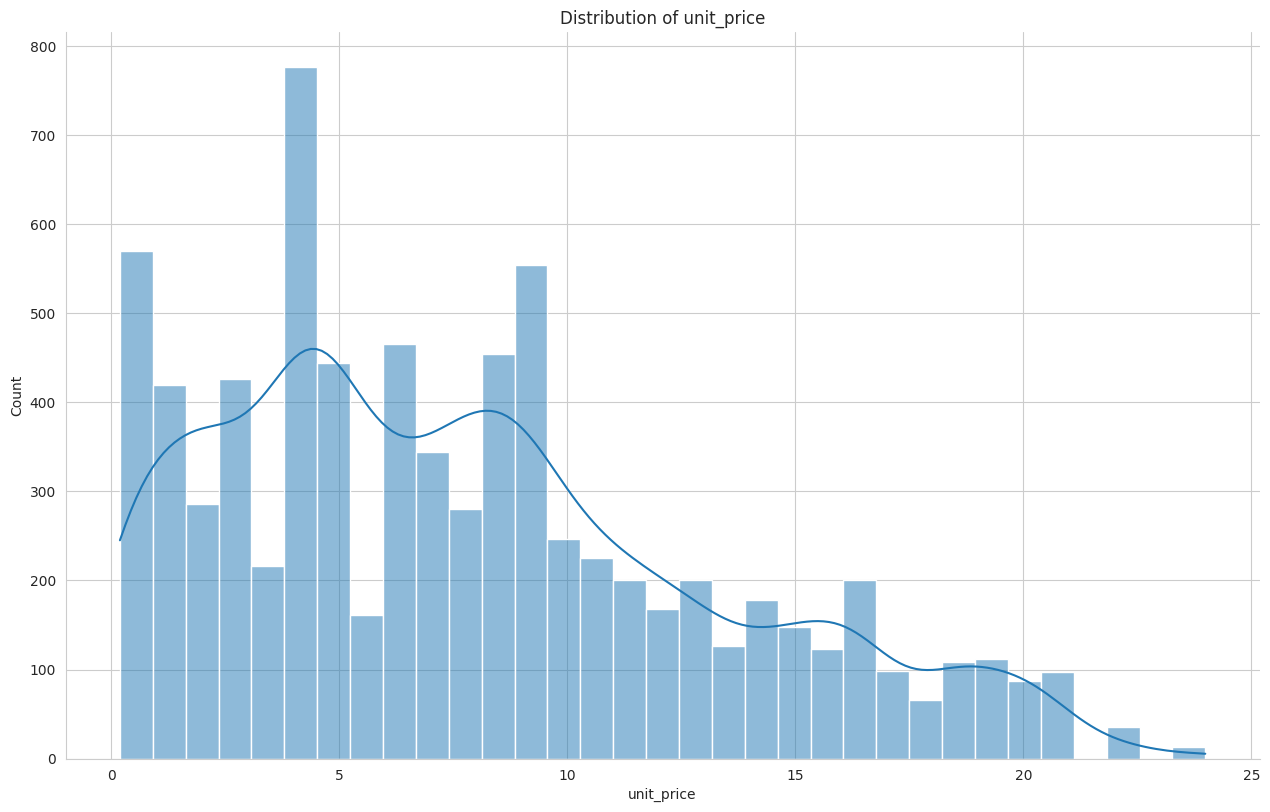

In [ ]:
plot_continuous_distribution(df, 'unit_price')

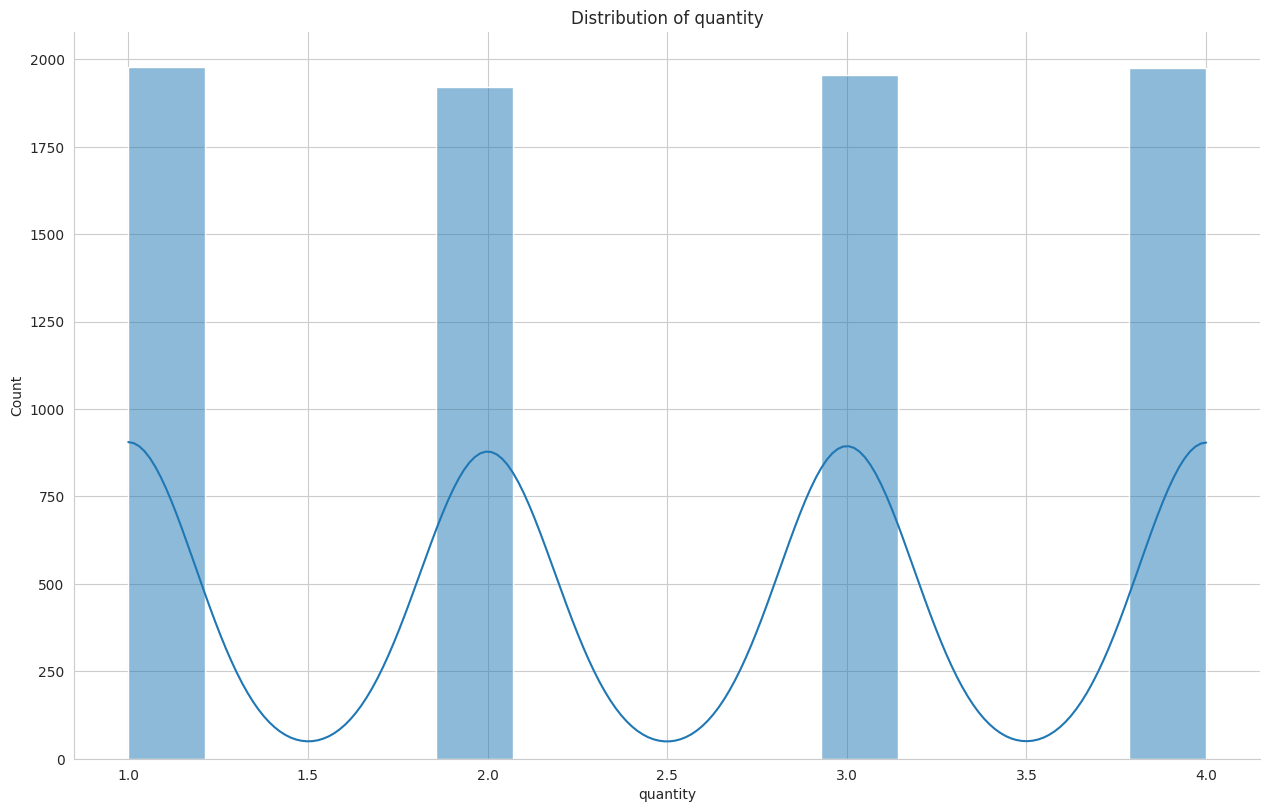

In [ ]:
plot_continuous_distribution(df, 'quantity')

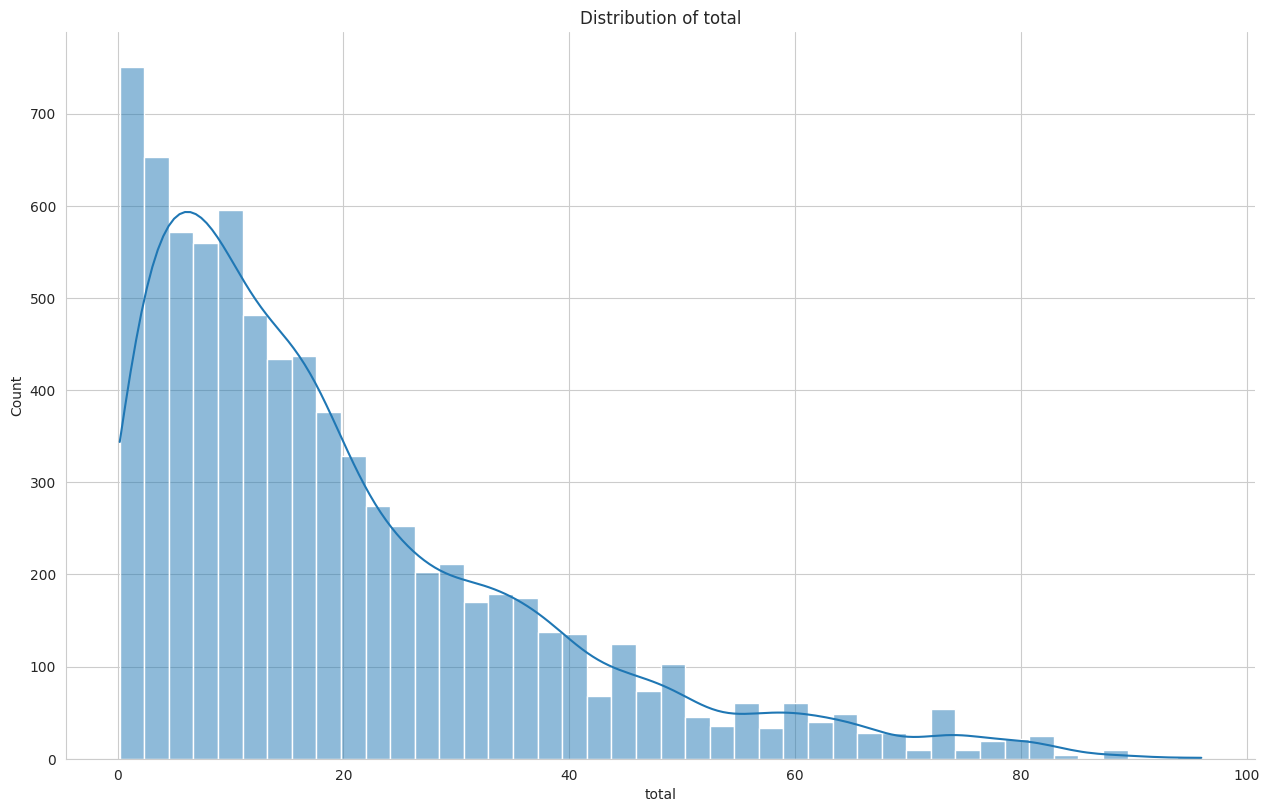

In [ ]:
plot_continuous_distribution(df, 'total')

In [ ]:
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

In [ ]:
get_unique_values(df, "product_id")

Column: product_id has 300 unique values

product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: count, Length: 300, dtype: int64


## demand of these peoducts are high


*   ecac012c-1dec-41d4-9ebd-56fb7166f6d9
*   7c55cbd4-f306-4c04-a030-628cbe7867c1,
* 3bc6c1ea-0198-46de-9ffd-514ae3338713
*   Oddc2379-adba-4fbØ-aa97-19fcafc738a1


## they must be kept in stock.

## but these are least sold items do better to keep the low qunatity of these products

* 49f7daa9-713a-4824-b378-aebb33ff8b2f
* a8fab83a-16d4-4db0-a83a-f824ecd8604a
* bc8de27do-2c44-4b5a-b178-59c45d054ccb
* 5adfc643-aa8e-4140-b2c3-98a946444632

In [ ]:
get_unique_values(df, 'category')

Column: category has 22 unique values

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64


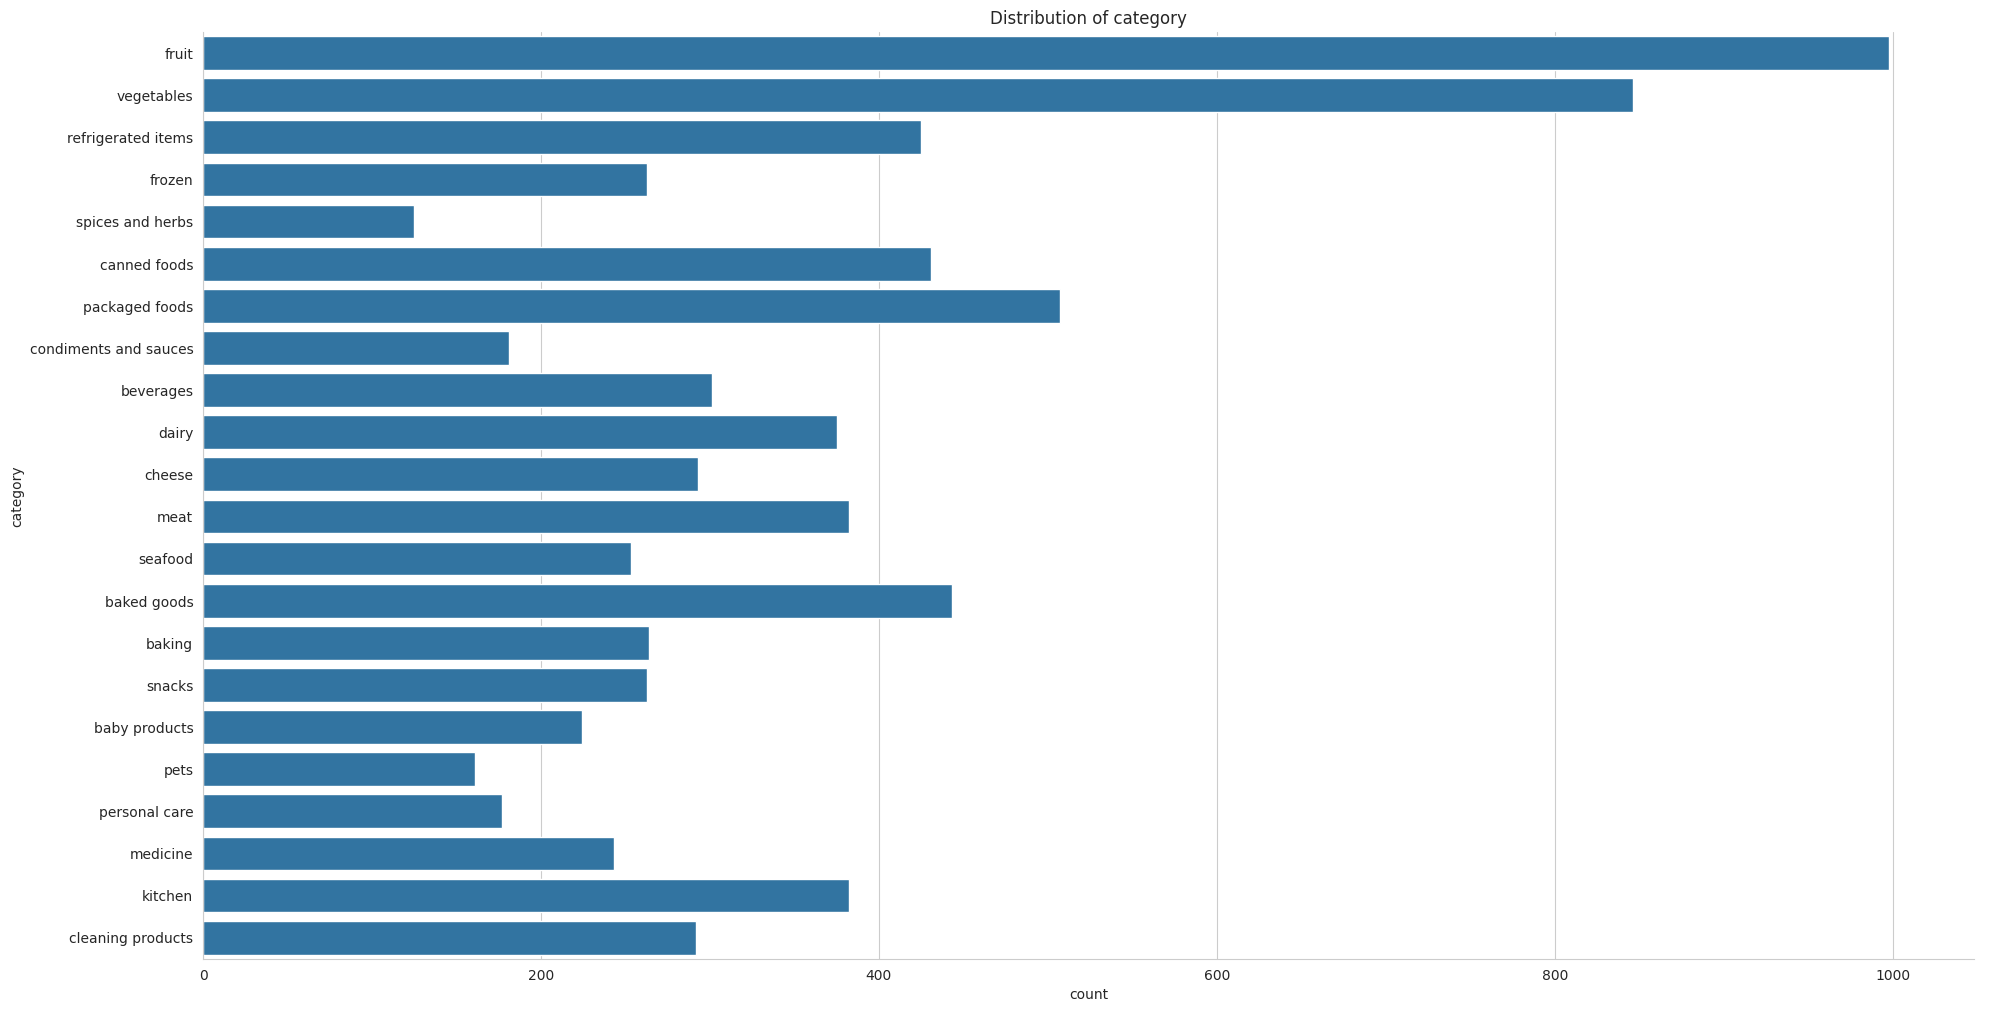

In [ ]:
def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    cat_plot = sns.catplot(data=data, y=column, kind='count', height=height, aspect=aspect)
    cat_plot.set(title=f'Distribution of {column}')

plot_categorical_distribution(df, 'category', height=10)

In [ ]:
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64


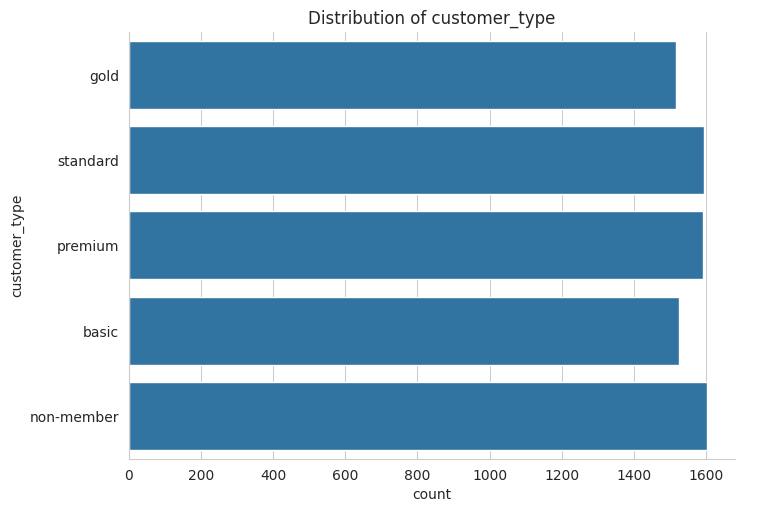

In [ ]:
plot_categorical_distribution(df, 'customer_type', height=5, aspect=1.5)

In [ ]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64


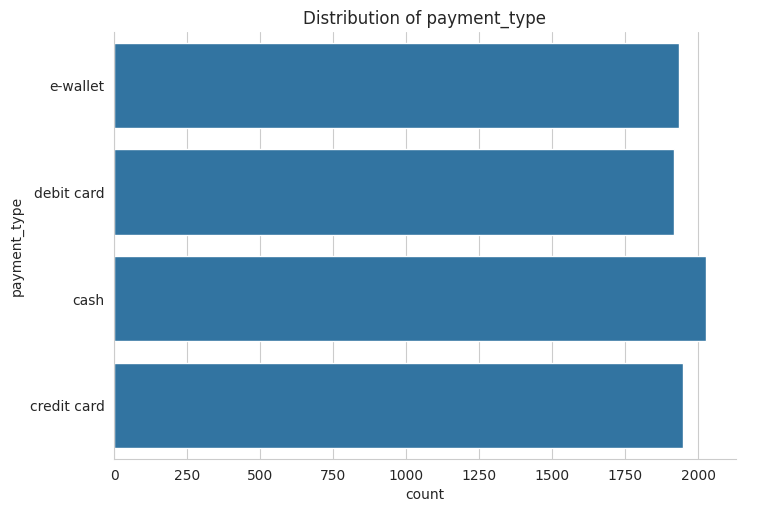

In [ ]:
plot_categorical_distribution(df, 'payment_type', height=5, aspect=1.5)


## here we can see mostly customers are using cash payments.

In [ ]:
get_unique_values(df, 'timestamp')

Column: timestamp has 7738 unique values

timestamp
2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: count, Length: 7738, dtype: int64


## converting the column to DateTime format

In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [ ]:
df = convert_to_datetime(df, 'timestamp')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


## changed succcessfully "1   timestamp       7829 non-null   datetime64[ns]"

In [ ]:
df['hour'] = df['timestamp'].dt.hour

In [ ]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [ ]:
get_unique_values(df, 'hour')

Column: hour has 11 unique values

hour
11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: count, dtype: int64


## by this hour column we can say most of the people came at around in noon(10-12 A.M) and evening (4-6 P.M)

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000
